# SI 618 - Homework #3: Data Visualization

Version 2023.09.21.1.CT

For this homework assignment, you will the small MovieLens dataset, available via https://files.grouplens.org/datasets/movielens/ml-latest-small.zip. Download that file to get the data, and also take some time to go through the [README](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) file.

Be sure to download your own copy of the dataset -- do not rely on data that you may have downloaded for a previous assignment.

A major challenge for you in this assignment is to devise a plan to tackle each question.  The question states the overall goal, and in some cases hints are provided, but you will need to think carefully about what data you need to answer each of the questions.  You may need to do some preprocessing of the data to get it into a form that you can use for visualization.


Each of the questions is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

**NOTE**: You are only permitted to use the pandas, Seaborn, and matplotlib libraries for creating visualizations in this assignment. You may use other libraries for other purposes, but you may not use them to create visualizations.

<hr>

First, let's do our usual imports (you might need to import additional modules depending on how you choose to tackle each question):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

And let's read the data (note: you might need to include path information if the data files are not in the same directory as this notebook):

In [2]:
movies = pd.read_csv('./ml-latest-small/movies.csv')
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
tags = pd.read_csv('./ml-latest-small/tags.csv')

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### Q1: 
Using the `movies` DataFrame, create a visualization that shows the number of movies for each decade from the 1900s to the 2010s.  Use the number in parentheses (e.g. (1975)) at the end of the title as the year.  Drop all rows that do not have a valid year. Be sure to include a title and axis labels.

In [4]:
# insert your code here
# check null values
print(movies.isnull().sum().sum(), ratings.isnull().sum().sum(),
      tags.isnull().sum().sum())

0 0 0


In [5]:
# from title column, extract year and add to new column
movies['year'] = movies['title'].str.extract(r'(\d{4})', expand=True)
movies['year'] = pd.to_numeric(movies['year'])
# drop rows that do not have year
movies = movies.dropna(subset=['year'])
movies.shape

(9730, 4)

In [6]:
# add a column for decade of the movie
# convert to int
movies['decade'] = (movies['year'] // 10 * 10).astype(int)
movies.head()

,movieId,title,genres,year,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,1990
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,1990
4,5,Father of the Bride Part II (1995),Comedy,1995.0,1990


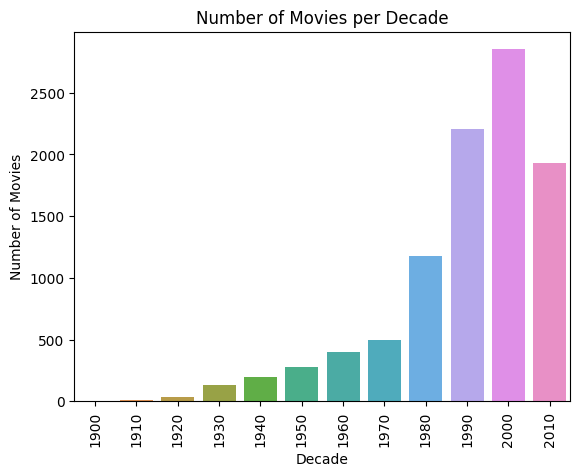

In [7]:
# select decades from 1900 to 2010
movies_1 = movies[(movies['decade'] >= 1900) & (movies['decade'] <= 2010)]

# visualize the number of movies per decade
sns.countplot(x='decade', data=movies_1)
# title and axis
plt.title('Number of Movies per Decade')
# vertical x-axis labels
plt.xticks(rotation=90)
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()

- We see an increasing trend in the number of movies per decade.
- An exponential growth is seen from the years 1980.

### Q2: 
Create a visualization that shows the number of movies in each genre.

**Hint**: the `pd.DataFrame.explode()` function might be useful here.

Be sure that your axis labels are legible!

In [8]:
# insert your code here
# explode each genre into a row
movies_2 = movies.assign(genres=movies['genres'].str.split('|')).explode(
    'genres')

# view data
movies_2.head()

,movieId,title,genres,year,decade
0,1,Toy Story (1995),Adventure,1995.0,1990
0,1,Toy Story (1995),Animation,1995.0,1990
0,1,Toy Story (1995),Children,1995.0,1990
0,1,Toy Story (1995),Comedy,1995.0,1990
0,1,Toy Story (1995),Fantasy,1995.0,1990


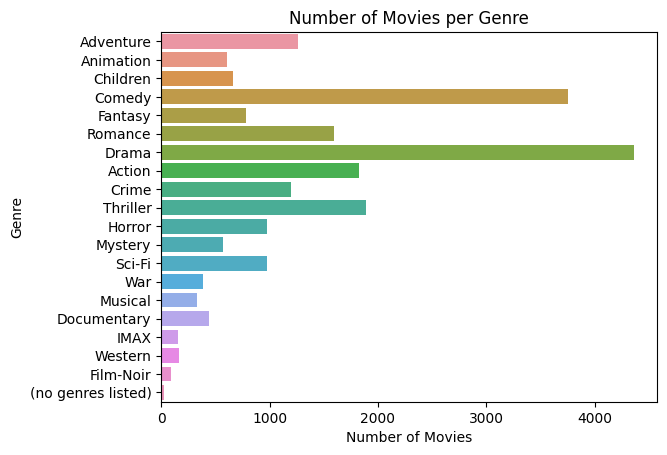

In [9]:
# visualize the number of movies per genre
sns.countplot(y='genres', data=movies_2)
# title and axis
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

- Drama is the most common genre,followed by Comdey and Thriller
- Romance, Action and Thriller are around 1500 each. Drama and Comedy are more than twice that value.
- Western, Firl-Noir are among the lest common ones

### Q3a: 
Create a visualization showing the distribution of the values from the `rating` column of the `ratings` DataFrame.  


In [10]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [11]:
ratings['movieId'].nunique()

9724

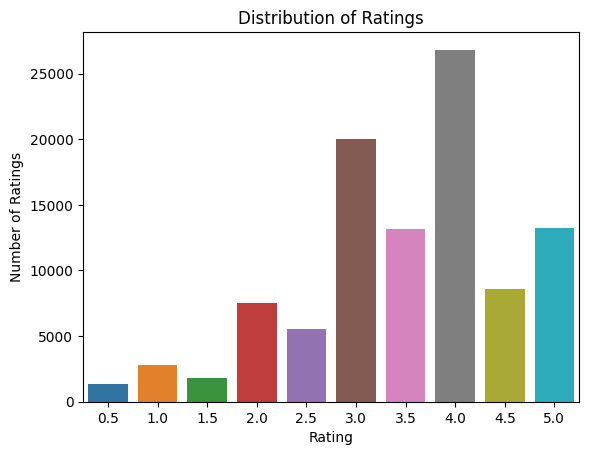

In [12]:
# insert your code here
# distribution of ratings
sns.countplot(x='rating', data=ratings)
# title and axis
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

- We see 3 and 4 as the most common ratings
- Rating of 5 and 3.5 are alsmot equal
- We see that the half ratings have similar trend to the integer ratings but with a smaller scale.
- The plot is left skewed.

### Q3b:
What do you notice about the relative number of whole-number ratings (1,2,3,4,and 5) compared to the half-ratings (0.5, 1.5, 2.5, 3.5, 4.5)?  Investigate the data further to see if you can figure out why that's the case.  (Hint: a scatterplot showing the ratings vs. time might be helpful.)

Insert your observations here.

In [13]:
# convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


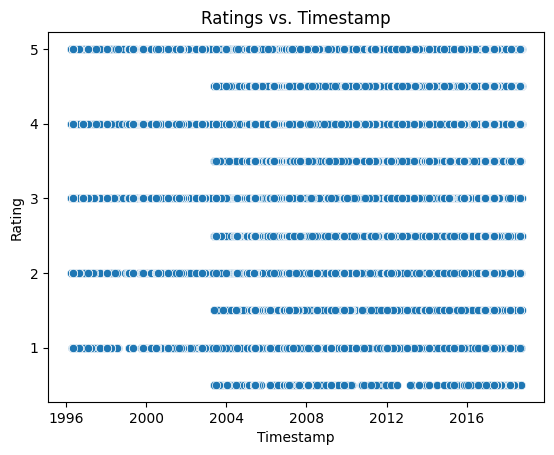

In [14]:
# insert your code here
# scatter plot of ratings vs. timestamp
sns.scatterplot(x='timestamp', y='rating', data=ratings)
# title and axis
plt.title('Ratings vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.show()

In [15]:
# value counts of ratings
ratings['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

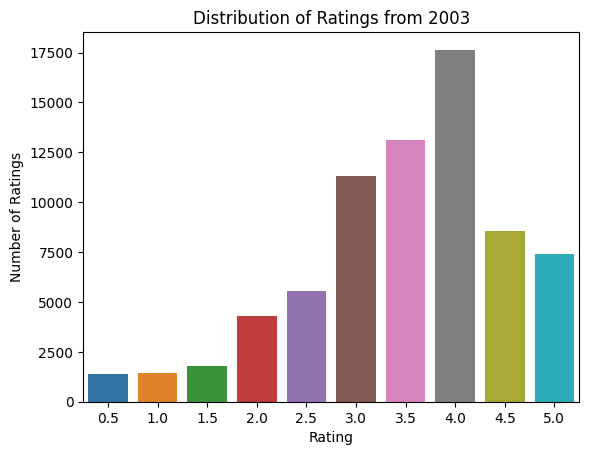

In [16]:
# count ratings from 2003
ratings_1 = ratings[ratings['timestamp'].dt.year >= 2003]
# plot ratings from 2003
sns.countplot(x='rating', data=ratings_1)
# title and axis
plt.title('Distribution of Ratings from 2003')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

- As seen from the plot, we can infere that the half-ratings must have begun from 2003, thus being quantitatively lesser than the whole number ratings that have begun from 1996.
- The Distribution Ratings from 2003 shows a more smoother plot for all rating values as compared to the original countplot

### Q4:
Write code to confirm the assertion that the ratings ["were created by 610 users between March 29, 1996 and September 24, 2018."](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

In [17]:
# insert your code here
# timestamp min and max
print('Ratings were created by',
      ratings['userId'].nunique(),
      'users between',
      ratings['timestamp'].dt.date.min(),
      'and',
      ratings['timestamp'].dt.date.max())

Ratings were created by 610 users between 1996-03-29 and 2018-09-24


### Q5:
Create a visualization showing the number of ratings produced on each day of the week.  

Hint: the `pd.to_datetime()` function might be useful here, as well as the `dt` accessor.

Make sure your axis labels are in a reasonable order.

In [18]:
# insert your code here
# get day of week from timestamp
ratings['day_of_week'] = ratings['timestamp'].dt.day_name()
ratings.head()

,userId,movieId,rating,timestamp,day_of_week
0,1,1,4.0,2000-07-30 18:45:03,Sunday
1,1,3,4.0,2000-07-30 18:20:47,Sunday
2,1,6,4.0,2000-07-30 18:37:04,Sunday
3,1,47,5.0,2000-07-30 19:03:35,Sunday
4,1,50,5.0,2000-07-30 18:48:51,Sunday


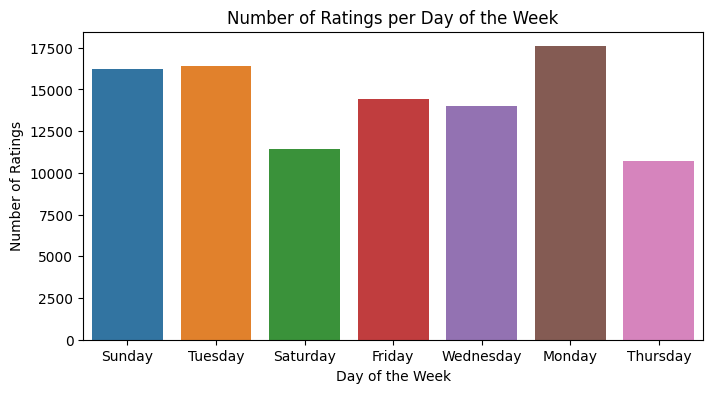

In [22]:
# figure size
plt.figure(figsize=(8, 4))
# visualize number of ratings produced by each day of the week
sns.countplot(x='day_of_week', data=ratings)
# title and axis
plt.title('Number of Ratings per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Ratings')
# order of days as in the week
# plt.xticks(np.arange(7), ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
#                           'Friday', 'Saturday'))
plt.show()

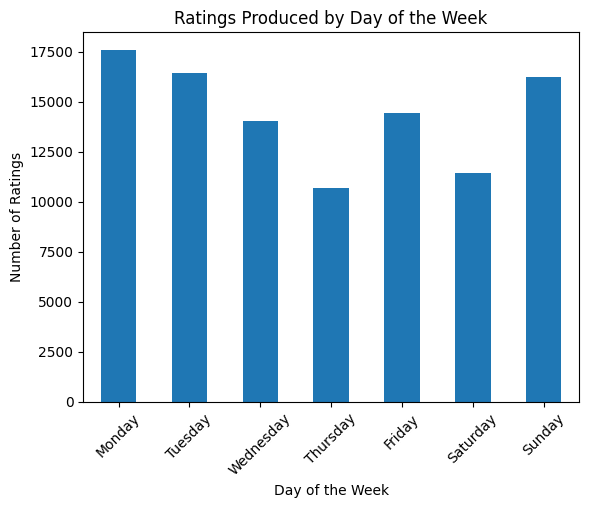

In [20]:
# Extract the day of the week from the 'timestamp' column
ratings['day_of_week'] = ratings['timestamp'].dt.day_name()

# Count the number of ratings produced on each day of the week
ratings_per_day = ratings['day_of_week'].value_counts().reindex([
'Monday',
'Tuesday',
'Wednesday',
'Thursday',
'Friday',
'Saturday',
'Sunday'])

# Create a bar plot
ratings_per_day.plot(kind='bar')
plt.title('Ratings Produced by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()


- Overall the Ratings per Day of the week seem to be a uniform distribution with mean about 15,000 ratings per day.
- Saturday is seen to show a bump in the Number of Ratings, which could be due to the fact that, since most movies are released on a Friday, the Ratings must have popped up on Saturday.
- The Ratings take a dip on Sunday, that day being a weekend / holiday.
- A fair share of ratings are generated on Mondays and Tuesdays and again taking a minor dip for Wednedays, Thursdays and Fridays.

### Q6a:

Create a new column called `taglength` in the `tags` DataFrame that contains the number of **characters** in the tag.

**Hint:** the `str.len()` function might be useful here.

In [21]:
# insert your code here
tags['taglength'] = tags['tag'].str.len()
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')
tags.head()

,userId,movieId,tag,timestamp,taglength
0,2,60756,funny,2015-10-24 19:29:54,5
1,2,60756,Highly quotable,2015-10-24 19:29:56,15
2,2,60756,will ferrell,2015-10-24 19:29:52,12
3,2,89774,Boxing story,2015-10-24 19:33:27,12
4,2,89774,MMA,2015-10-24 19:33:20,3


### Q6b: 
Create a histogram of your newly created `taglength` column.  Experiment with different numbers of bins (or binwidths) until you're happy with the representation.

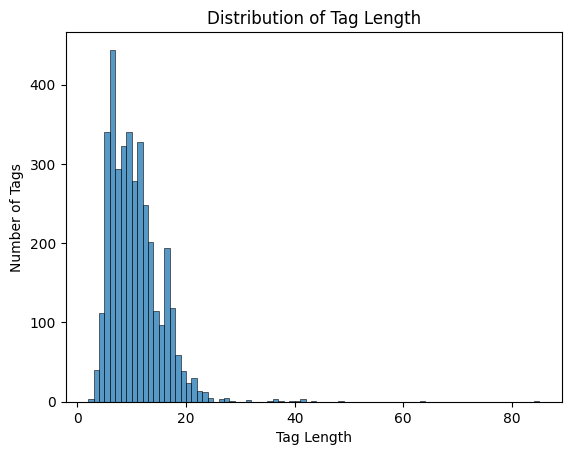

In [22]:
# insert your code here
# histogram of tag length
sns.histplot(x='taglength', data=tags, binwidth=1)
# title and axis
plt.title('Distribution of Tag Length')
plt.xlabel('Tag Length')
plt.ylabel('Number of Tags')
plt.show()

- I have set the binwidth to 1 so that each tag length corresponds to its numeric value.

### Q7:
Create a visualization that shows the average rating for each genre.


In [23]:
# insert your code here
# merge movies and ratings dataframes
movies_ratings = pd.merge(movies_2, ratings, on='movieId')
movies_ratings.head()

,movieId,title,genres,year,decade,userId,rating,timestamp,day_of_week
0,1,Toy Story (1995),Adventure,1995.0,1990,1,4.0,2000-07-30 18:45:03,Sunday
1,1,Toy Story (1995),Adventure,1995.0,1990,5,4.0,1996-11-08 06:36:02,Friday
2,1,Toy Story (1995),Adventure,1995.0,1990,7,4.5,2005-01-25 06:52:26,Tuesday
3,1,Toy Story (1995),Adventure,1995.0,1990,15,2.5,2017-11-13 12:59:30,Monday
4,1,Toy Story (1995),Adventure,1995.0,1990,17,4.5,2011-05-18 05:28:03,Wednesday


In [24]:
# average rating per genre
rating_genres = movies_ratings.groupby('genres')['rating'].mean()

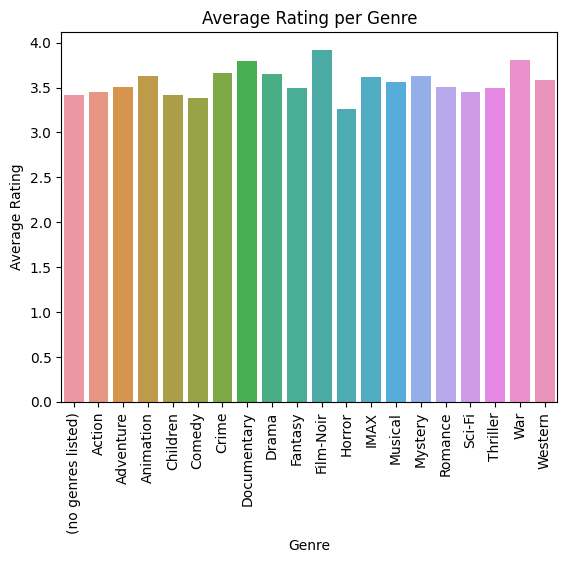

In [25]:
# plot ratings per genre
sns.barplot(x=rating_genres.index, y=rating_genres)
# title and axis
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

- The Average Ratings per Genre seem to be a unifrom distribution across all Genres with mean of 3.5
- The ratings are averaged considering them as integer values rather than a categorical variables.

### Q8:
Create a visualization that shows the distribution of the **number** of ratings of "good" movies (i.e., those with a mean rating of 3.5 or highter) and "bad" movies (i.e., those with a mean rating of less than 3.5), broken down by the decade when the movie was released.

**Hint:** You will need to join the `movies` and `ratings` DataFrames to get the decade information.

**Hint:** You may want to create a box plot or a violin plot (or both).

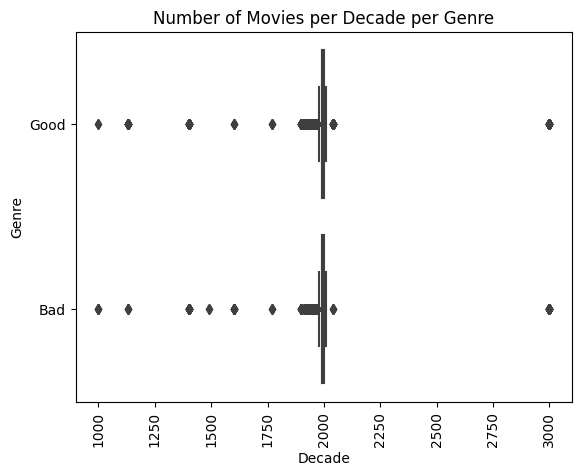

In [26]:
# insert your code here
# category of movies on basis of average rating
movies_ratings['rating_category'] = np.where(
    movies_ratings['rating'] >= 3.5, 'Good', 'Bad')

# boxplot of number of movies in each category per decade
sns.boxplot(x='decade', y='rating_category', data=movies_ratings)
plt.title('Number of Movies per Decade per Genre')
plt.xlabel('Decade')
plt.ylabel('Genre')
plt.xticks(rotation=90)
plt.show()

In [51]:
movies_ratings_1 = movies_ratings[(movies_ratings['decade'] >= 1900)
                          & (movies_ratings['decade'] <= 2010)]

df = pd.DataFrame(movies_ratings_1.groupby(['decade', 'rating_category'])['rating'].value_counts())
# save to csv
df.to_csv('movies_ratings.csv')
movies_ratings_1.head()

,movieId,title,genres,year,decade,userId,rating,timestamp,day_of_week,rating_category
0,1,Toy Story (1995),Adventure,1995.0,1990,1,4.0,2000-07-30 18:45:03,Sunday,Good
1,1,Toy Story (1995),Adventure,1995.0,1990,5,4.0,1996-11-08 06:36:02,Friday,Good
2,1,Toy Story (1995),Adventure,1995.0,1990,7,4.5,2005-01-25 06:52:26,Tuesday,Good
3,1,Toy Story (1995),Adventure,1995.0,1990,15,2.5,2017-11-13 12:59:30,Monday,Bad
4,1,Toy Story (1995),Adventure,1995.0,1990,17,4.5,2011-05-18 05:28:03,Wednesday,Good


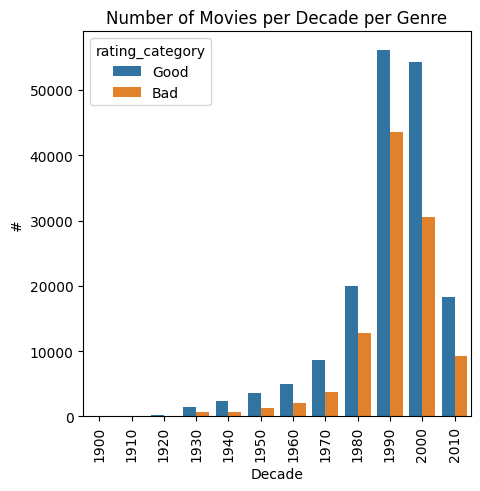

In [56]:
# make boxplot of df
# figsize
plt.figure(figsize=(5, 5))
sns.boxplot(x='decade', y = '', hue='rating_category', data=movies_ratings_1)
plt.title('Number of Movies per Decade per Genre')
plt.xlabel('Decade')
plt.ylabel('#')
plt.xticks(rotation=90)
plt.show()

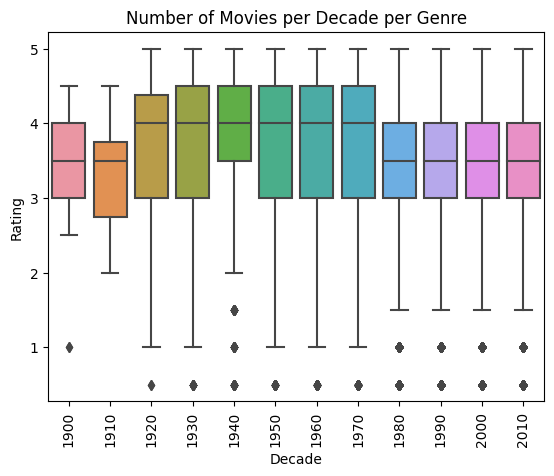

In [35]:
# boxplot of number of movies in each category per decade
sns.boxplot(x='decade', y='rating', data=movies_ratings_1)
plt.title('Number of Movies per Decade per Genre')
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

- The boxlpot is highly impacted due to the presence of outliers for movies on both the ends.
- I have therefore again considered the subset of decades from 1900 to 2010 for better representation of the plot.

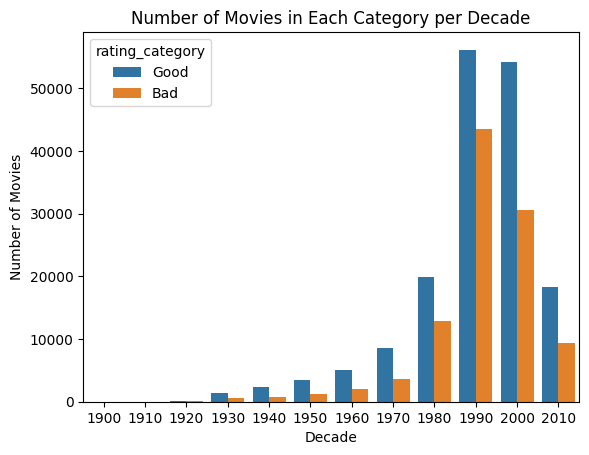

In [27]:
# visualize number of movies in each category in decades
sns.countplot(x='decade', hue='rating_category', data=movies_ratings_1)
# title and axis
plt.title('Number of Movies in Each Category per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()


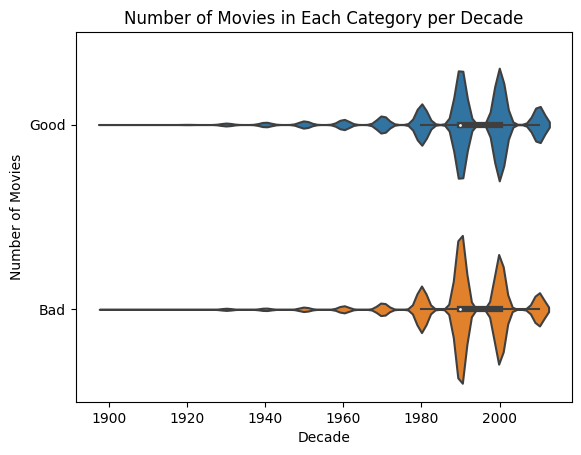

In [28]:
# violin plot of movies per decade, hue = rating category
sns.violinplot(x='decade', y='rating_category', data=movies_ratings_1)
# title and axis
plt.title('Number of Movies in Each Category per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()

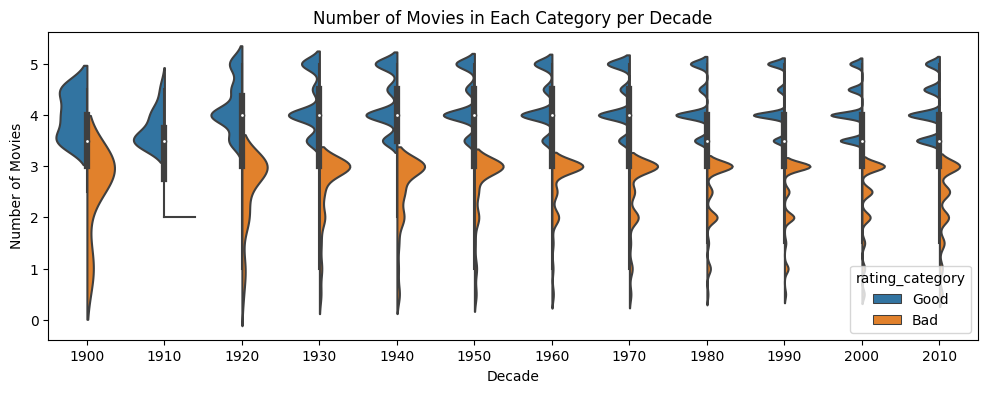

In [29]:
# violin plot of movies per decade, hue = rating category
# figure size
plt.figure(figsize=(12, 4))
sns.violinplot(x='decade', y='rating', hue='rating_category', split=True,
               data=movies_ratings_1)
# title and axis
plt.title('Number of Movies in Each Category per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()

In [30]:
# value_counts of movies per decade
movies_ratings_1['decade'].value_counts()

decade
1990    99680
2000    84866
1980    32759
2010    27550
1970    12245
1960     6991
1950     4786
1940     2998
1930     2016
1920      242
1900       32
1910       15
Name: count, dtype: int64

- We see that both Good as well as Bad movies show an increasing trend with each decade.
- The plots are leftward skewed.
- The violin plot shows fragmented sections as the data is a discrete one.

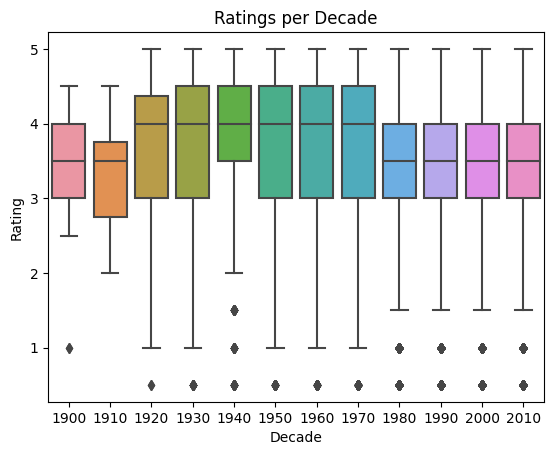

In [32]:
# make boxplot of ratings per decade
sns.boxplot(x='decade', y='rating', data=movies_ratings_1)
# title and axis
plt.title('Ratings per Decade')
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.show()

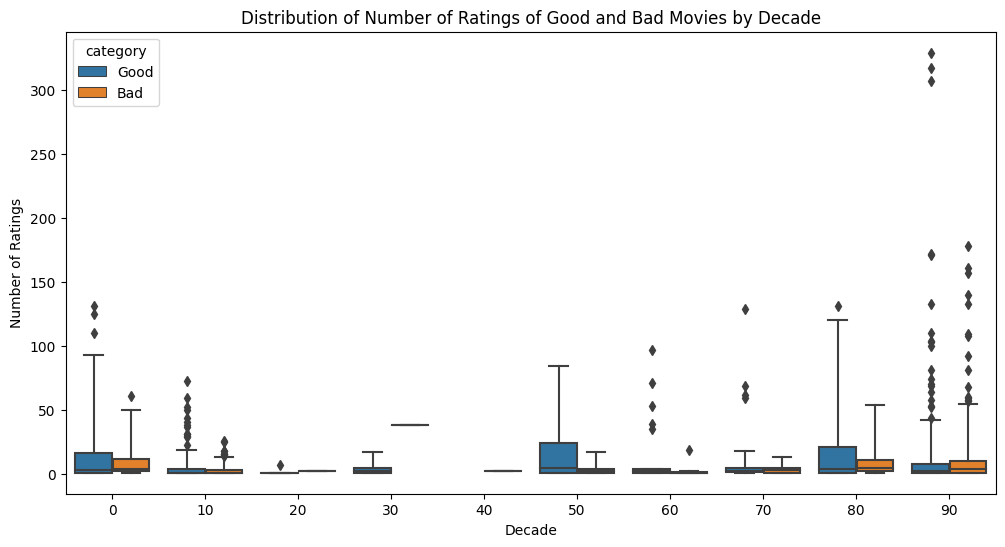

In [25]:
# Extract year from the title
movies['year'] = movies['title'].str.extract(r'(\d4)')
movies = movies.dropna(subset=['year'])
movies['year'] = movies['year'].astype(int)

# Calculate the decade
movies['decade'] = (movies['year'] // 10) * 10
# movies
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')
count_ratings = ratings.groupby('movieId')['rating'].count().reset_index(name='num_ratings')


# Merge the calculated DataFrames
rating_stats = pd.merge(mean_ratings, count_ratings, on='movieId')

# rating_stats
movie_ratings = pd.merge(movies, rating_stats, on='movieId')

# Categorize movies as "good" or "bad" based on mean rating
movie_ratings['category'] = movie_ratings['mean_rating'].apply(lambda x: 'Good' if x >= 3.5 else 'Bad')


# Create a box plot or violin plot
plt.figure(figsize=(12,6))
sns.boxplot(x='decade', y='num_ratings', hue='category', data=movie_ratings, whis=5)
plt.title('Distribution of Number of Ratings of Good and Bad Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Ratings')
plt.show()

**Disclaimer:** Used Githut copilot for help with the code.

## END OF NOTEBOOK